# Borrower's Default Risk

We were tasked with preparing a report for the credit division of a bank. The objective of the report is to examine how a customer's marital status and number of children impact the probability of default in loan repayment. The bank already possesses data on the creditworthiness of its customers.

The findings from this report will be taken into consideration during the credit assessment process for potential customers. Credit scoring is employed to assess the repayment capability of prospective borrowers.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Project-Description" data-toc-modified-id="1.-Project-Description-1">1. Project Description</a></span></li><li><span><a href="#2.-Open-and-Read-Data-General-Information" data-toc-modified-id="2.-Open-and-Read-Data-General-Information-2">2. Open and Read Data General Information</a></span></li><li><span><a href="#3.-Data-Exploration" data-toc-modified-id="3.-Data-Exploration-3">3. Data Exploration</a></span></li><li><span><a href="#4.-Data-Transformation" data-toc-modified-id="4.-Data-Transformation-4">4. Data Transformation</a></span><ul class="toc-item"><li><span><a href="#4.1-Education" data-toc-modified-id="4.1-Education-4.1">4.1 Education</a></span></li><li><span><a href="#4.2-Children" data-toc-modified-id="4.2-Children-4.2">4.2 Children</a></span></li><li><span><a href="#4.3-Days-Employed" data-toc-modified-id="4.3-Days-Employed-4.3">4.3 Days Employed</a></span></li><li><span><a href="#4.4-Day-of-Birth-Years" data-toc-modified-id="4.4-Day-of-Birth-Years-4.4">4.4 Day of Birth Years</a></span></li><li><span><a href="#4.5-Family-Status" data-toc-modified-id="4.5-Family-Status-4.5">4.5 Family Status</a></span></li><li><span><a href="#4.6-Gender" data-toc-modified-id="4.6-Gender-4.6">4.6 Gender</a></span></li><li><span><a href="#4.7-Income-Type" data-toc-modified-id="4.7-Income-Type-4.7">4.7 Income Type</a></span></li><li><span><a href="#4.8-Removing-Duplicates" data-toc-modified-id="4.8-Removing-Duplicates-4.8">4.8 Removing Duplicates</a></span></li><li><span><a href="#4.9-Solving-Missing-Values" data-toc-modified-id="4.9-Solving-Missing-Values-4.9">4.9 Solving Missing Values</a></span><ul class="toc-item"><li><span><a href="#Fixing-the-value-in-days_employed" data-toc-modified-id="Fixing-the-value-in-days_employed-4.9.1">Fixing the value in <code>days_employed</code></a></span></li><li><span><a href="#Fixing-the-value-in-total_income" data-toc-modified-id="Fixing-the-value-in-total_income-4.9.2">Fixing the value in <code>total_income</code></a></span></li><li><span><a href="#Final-Check" data-toc-modified-id="Final-Check-4.9.3">Final Check</a></span></li></ul></li><li><span><a href="#4.10-Data-Categorization" data-toc-modified-id="4.10-Data-Categorization-4.10">4.10 Data Categorization</a></span></li></ul></li><li><span><a href="#5.-Testing-Hypotheses" data-toc-modified-id="5.-Testing-Hypotheses-5">5. Testing Hypotheses</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#5.1-Correlation-between-Number-of-Children-and-Default-Risk" data-toc-modified-id="5.1-Correlation-between-Number-of-Children-and-Default-Risk-5.0.1">5.1 Correlation between Number of Children and Default Risk</a></span></li><li><span><a href="#5.4-Correlation-between-Family-Status-and-Default-Risk" data-toc-modified-id="5.4-Correlation-between-Family-Status-and-Default-Risk-5.0.2">5.4 Correlation between Family Status and Default Risk</a></span></li><li><span><a href="#5.5-Correlation-between-Income-Level-and-Default-Risk" data-toc-modified-id="5.5-Correlation-between-Income-Level-and-Default-Risk-5.0.3">5.5 Correlation between Income Level and Default Risk</a></span></li><li><span><a href="#5.6-Correlation-between-Credit-Objective-and-Default-Risk" data-toc-modified-id="5.6-Correlation-between-Credit-Objective-and-Default-Risk-5.0.4">5.6 Correlation between Credit Objective and Default Risk</a></span></li></ul></li></ul></li><li><span><a href="#6.-General-Conclusion" data-toc-modified-id="6.-General-Conclusion-6">6. General Conclusion</a></span></li></ul></div>

## 1. Project Description

The objective of this project is to investigate the potential relationship between a customer's marital status and the number of children they have with the probability of default in loan repayment.

To achieve this, we have been provided with a dataset that includes anonymized information about banking debtors, specifically data relevant to this project's objectives.

In addition to marital status and number of children, the dataset contains other valuable information that can enhance our analysis of default probability among customers.

Initially, we will focus on testing the hypothesis that there is a correlation between marital status, number of children, and the probability of default. However, we will also explore other factors that could contribute to an increased default probability, apart from these two factors.

To ensure the validity of our conclusions, the dataset will undergo a cleaning process involving data transformation, handling missing values, categorization, feature engineering, grouping, duplicate removal, and other necessary steps.

We will employ various Python data analysis methods and libraries to carry out this project effectively.

## 2. Open and Read Data General Information

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
try:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')
except:
    df = pd.read_csv('credit_scoring_eng.csv')

## 3. Data Exploration

**Data Description**
- `children` - the number of children in the family
- `days_employed` - customer's work experience in days
- `dob_years` - customer's age in years
- `education` - level of customer education
- `education_id` - identifier for the customer's education level
- `family_status` - identifier for the customer's marital status
- `family_status_id` - identifier of marital status
- `gender` - the customer's gender
- `income_type` - type of work
- `debt` - whether the customer has a loan payment debt
- `total_income` - monthly income
- `purpose` - the purpose of getting a loan

In [3]:
# Checking dataset size
print(df.shape)

(21525, 12)


We have quite a large amount of data here, spanning 12 columns and 21,525 rows. This amount of data is sufficient to be able to draw valid conclusions. However, we will check whether the data is clean or not.

In [4]:
# Check the data description
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


There are several insights that can be derived from the general information in the available data.

1. In the `days_employed` and `total_income` columns, there are lower values indicating missing values.

2. Regarding the `children` column:
   - The range of values for the number of children is quite wide, suggesting the presence of outliers.
   - There are negative values in this column, which should not be present.

3. Concerning the `days_employed` column:
   - There are negative values, which should be addressed as they are not valid.
   - The range of values in this column is also wide, indicating the presence of outliers.

4. In the `dob_years` column:
   - There is an age value of 0, which is not possible and should be reviewed.
   - The age values are fractional, and they need to be rounded up to the nearest whole number.

5. Regarding the `total_income` column:
   - The range of values (min and max) is quite wide, indicating the presence of outliers.

These observations provide valuable insights for further data cleaning and analysis.

In [5]:
# Check the data contents
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


**Findings:**

1. The `days_employed` column has negative values and is in a float (fractional) data format, which indicates potential issues with data input. The number of days should be represented as whole numbers (integers) and should be positive.

2. The `education` column contains information with different capitalization, resulting in different unique values for the same information. The cases in this column need to be standardized or generalized to ensure consistency.

3. The `purpose` column contains various descriptions for the same purpose, which can be simplified. For example, phrases like 'purchase of the house,' 'housing transactions,' and 'purchase of the house for my family' can be combined under a single category such as 'housing transaction' to make the data more concise and easier to analyze.

In [6]:
# Check general data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


There are two columns with non-null values that do not add up to 21,525 (total number of rows), namely `days_employed` and `total_income`. However, both have the same non-null value. Likely, the missing values in these two columns are symmetrical. This means that missing values in the `days_employed` column are also missing in the `total_income` column.

In [7]:
# Creates a new dataframe containing all rows with missing values
missing_data = df[df.isna().any(axis=1)]
missing_data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Based on this filter, it appears that each missing value (NaN) in the `days_employed` column is also accompanied by a missing value (NaN) in the `total_income` column. However, further investigation is required to confirm if this pattern holds true for every row, considering that the displayed rows in the filter results table are limited, while the total number of rows is 2,174.

In [8]:
# Filters data by missing values
missing_data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

It can be seen that the number of missing rows in the `total income` column is exactly the same as the `days_employed` column. That means, for each missing column in `days_employed` it is also missing in the `total_income` column. Both are symmetrical.

We will check the percentage of this missing value, whether it is large enough or not.

In [9]:
# Checks the percentage of missing values in all data
round(df.isna().sum()/ len(df) * 100, 2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

Rows with missing values ​​make up about 10 percent of the original dataframe's total rows. This value is large enough, so it cannot be ignored or simply deleted, because it can affect the overall results of the analysis. We will change it later.

**Preliminary Conclusions:**

- The missing values in the `days_employed` and `total_income` columns exhibit a symmetrical pattern.
- The number of missing rows is significant, accounting for approximately 10 percent of the total data.
- Most of the available data is still reliable and can be utilized for further analysis or to infer missing values.
- There appears to be a strong correlation between the `days_employed` and `total_income` columns.
- These missing values in both columns might be due to customers no longer being employed, resulting in a lack of income. Alternatively, it could indicate that the customers have not started working yet.
- However, customers with missing values in these columns have provided information in the `income_type` column.
- Based on the information in the `income_type` column, customers with missing values come from various income sources, including retirees, civil servants, business owners, and private employees.
- Therefore, based on this data, customers with missing values are not necessarily unemployed individuals. Additionally, not all of them are retirees. We will examine the number of missing values among retired customers.
- To further investigate, we will analyze the `dob_years` column, which represents the customer's age, to determine if customers with missing values fall into the unemployed or older/retired age category.

In [10]:
# Defines a function to calculate the distribution of values per column 
def counting_values(data, column):
    c = data[column].value_counts()
    p = data[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    value = pd.concat([c,p], axis=1, keys=['counts', '%'])
    return value

In [11]:
# Checking the distribution of values in income_type column from the missing_data dataset
counting_values(missing_data, 'income_type')

,counts,%
employee,1105,50.8%
business,508,23.4%
retiree,413,19.0%
civil servant,147,6.8%
entrepreneur,1,0.0%


The number of customers with missing values in the income column and number of days worked, who are retirees, is not the majority. The amount is less than 20 percent. So, it is likely that the majority of them are active workers (incorrectly inputted data).

In [12]:
# Examine the distribution of values in `dob_year` from the missing_data dataset
# This aims to assess whether customers with NaN values are from the retirement age group.
counting_values(missing_data, 'dob_years')

,counts,%
34,69,3.2%
40,66,3.0%
42,65,3.0%
31,65,3.0%
35,64,2.9%
36,63,2.9%
47,59,2.7%
41,59,2.7%
30,58,2.7%
28,57,2.6%


array([[<Axes: title={'center': 'dob_years'}>]], dtype=object)

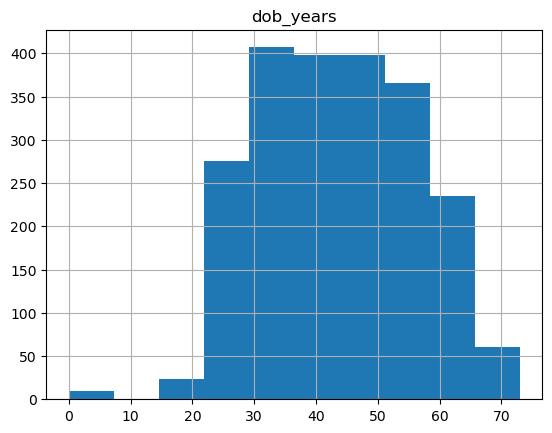

In [13]:
# Check the distribution visualization
missing_data.hist('dob_years')

Based on age distribution, the majority of customers with missing values also come from productive age, not old age/retirement. Again, this emphasizes the possibility that the missing values are due to incorrect data input.

**Findings**

- The distribution of customers with missing values in the `total_income` and `days_employed` columns is relatively uniform across all age groups.
- The majority of missing values occur among customers in the working-age range, indicating that they are not retired.
- Based on these findings, it appears that the missing values in both columns occur randomly, and there is no specific pattern that can be used to determine a single treatment approach for handling them.
- To validate these findings, we will compare the distribution of missing values with the original dataset (df) to determine if the pattern remains consistent.

In [14]:
# Examine the values distribution in income_type column across dataset
counting_values(df, 'income_type')

,counts,%
employee,11119,51.7%
business,5085,23.6%
retiree,3856,17.9%
civil servant,1459,6.8%
unemployed,2,0.0%
entrepreneur,2,0.0%
student,1,0.0%
paternity / maternity leave,1,0.0%


The value distribution pattern in the initial table (df) is almost similar to the missing_data table. Employers are more than 50 percent, while retirees are less than 20 percent. Thus, later we can fill in the data in the column with missing values ​​based on the mean or median of the entire data.

array([[<Axes: title={'center': 'dob_years'}>]], dtype=object)

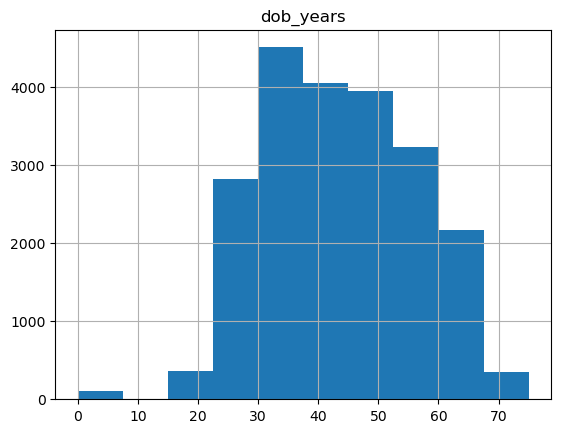

In [15]:
# Examine the distribution visualization of `dob_years` data on the df dataset
df.hist('dob_years')

In the `dob_years` column, the distribution pattern is more or less the same, the majority of customers are of productive age.

So, we can also use this column as a reference to fill in the missing values ​​later.

**Temporary Conclusions**

- After comparing the distribution of income types and age data between the dataset with missing values and the overall dataset, it is observed that the patterns are similar.
- This indicates that the missing values in the `total_income` and `days_employed` columns are random and align with the overall data distribution.
- To further validate this observation, we will analyze the other columns in the overall dataset and compare them with the corresponding columns in the dataset with missing values.

In [16]:
# Comparing the distribution of data in both datasets based on the 'children' column
print('Main Dataset Distribution')
display(counting_values(df, 'children'))
print('='*30)
print('Missing Value Dataset Distribution')
display(counting_values(missing_data, 'children'))

Main Dataset Distribution


,counts,%
0,14149,65.7%
1,4818,22.4%
2,2055,9.5%
3,330,1.5%
20,76,0.4%
-1,47,0.2%
4,41,0.2%
5,9,0.0%


Missing Value Dataset Distribution


,counts,%
0,1439,66.2%
1,475,21.8%
2,204,9.4%
3,36,1.7%
20,9,0.4%
4,7,0.3%
-1,3,0.1%
5,1,0.0%


Both display relatively similar data distribution patterns in the `children` column.\
We try for `gender` column.

In [17]:
# Comparing the distribution of data in both datasets based on the 'gender' column
print('Main Dataset Distribution')
display(counting_values(df, 'gender'))
print('='*30)
print('Missing Value Dataset Distribution')
display(counting_values(missing_data, 'gender'))

Main Dataset Distribution


,counts,%
F,14236,66.1%
M,7288,33.9%
XNA,1,0.0%


Missing Value Dataset Distribution


,counts,%
F,1484,68.3%
M,690,31.7%


The `gender` column also has a similar scatter pattern. We checked the `debt` column.

In [18]:
# Comparing the distribution of data in both datasets based on the 'debt' column
print('Main Dataset Distribution')
display(counting_values(df, 'debt'))
print('='*30)
print('Missing Value Dataset Distribution')
display(counting_values(missing_data, 'debt'))

Main Dataset Distribution


,counts,%
0,19784,91.9%
1,1741,8.1%


Missing Value Dataset Distribution


,counts,%
0,2004,92.2%
1,170,7.8%


We also get similar results in the `debt` column. Both customers with completely filled in values, as well as customers with missing values, have the same default distribution.

**Conclusion**

- Upon analyzing the majority of the columns in both the dataset with missing values and the overall dataset, it can be concluded that they exhibit similar patterns. 
- The missing values in the `total_income` and `days_employed` columns are symmetrically distributed with a random pattern, suggesting a possible system error rather than being attributed to specific conditions.
- In the next steps, we will proceed to fill in the missing values in these two columns using appropriate values based on relevant categories and groupings. 
- Additionally, we will refine and simplify the data in other columns to facilitate further analysis.

## 4. Data Transformation

In this section, we will address and rectify the errors found in the dataset we have received, aiming to create a cleaner and more streamlined dataset for analysis purposes.

We will leverage the insights gained from the initial exploration of the dataset to guide our investigation and refinement process.

### 4.1 Education

In [19]:
# Checks for unique values in the education column
sorted(df['education'].unique())

["BACHELOR'S DEGREE",
 "Bachelor's Degree",
 'GRADUATE DEGREE',
 'Graduate Degree',
 'PRIMARY EDUCATION',
 'Primary Education',
 'SECONDARY EDUCATION',
 'SOME COLLEGE',
 'Secondary Education',
 'Some College',
 "bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

- There are a number of categories that are the same, but are counted as unique values ​​due to case differences.
- For example, "BACHELOR'S DEGREE" and "Bachelor's Degree" are the same value, but are counted as different unique values ​​due to case differences.
- This could have happened due to the different writing style of each customer when filling in the data.
- We can solve this duplicate by changing all cases to lower. We will use the `str.lower()` method.

In [20]:
# Change to lower case
df['education'] = df['education'].str.lower()

In [21]:
# Verify unique values in the `education` Column
sorted(df['education'].unique())

["bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

Data variation is now simpler.

### 4.2 Children

In [22]:
# Check the value distribution in the `children` column
counting_values(df, 'children')

,counts,%
0,14149,65.7%
1,4818,22.4%
2,2055,9.5%
3,330,1.5%
20,76,0.4%
-1,47,0.2%
4,41,0.2%
5,9,0.0%


- We have identified outliers in the number of children column, specifically the value 20. 
- This is a rare occurrence, especially considering it appears in 76 customer records. 
- It is likely due to incorrect data input.
- Additionally, we have found a value of -1 in the number of children category, which is not a valid value.
- To address these outliers, we will replace the value 20 with 2 and the value -1 with 1 using the `replace()` method. 
- By doing so, the number of customers with 1 and 2 children will increase accordingly.

In [23]:
# Replace unreasonable data with new values
df['children'] = df['children'].replace([20,-1], [2,1])

In [24]:
# Re-check data after repair
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [25]:
# Re-check data distribution
counting_values(df, 'children')

,counts,%
0,14149,65.7%
1,4865,22.6%
2,2131,9.9%
3,330,1.5%
4,41,0.2%
5,9,0.0%


Data distribution makes more sense now.

### 4.3 Days Employed

In [26]:
# Check the distribution of the `days_employed` column
counting_values(df, 'days_employed')

,counts,%
-8437.673028,1,0.0%
-3507.818775,1,0.0%
354500.415854,1,0.0%
-769.717438,1,0.0%
-3963.590317,1,0.0%
...,...,...
-1099.957609,1,0.0%
-209.984794,1,0.0%
398099.392433,1,0.0%
-1271.038880,1,0.0%


In [27]:
len(df['days_employed'].value_counts())

19351

- The `days_employed` column contains numerous unique values, and all of the displayed data is in negative format. 
- To gain a better understanding, we will examine the percentage of negative values and determine if there are any positive values present.

In [28]:
# Compares the number of positive and negative values
round((df['days_employed'] < 1).value_counts(normalize=True), 2)

True     0.74
False    0.26
Name: days_employed, dtype: float64

- Approximately 74 percent of the values are negative. 
- Negative values in this context might indicate that the number of working days is counted in reverse from a specific reference date, such as the current date. 
- This could potentially be attributed to a system error.
- To address this issue, we will convert the negative values to positive values, assuming that the negative sign was mistakenly assigned. 
- Additionally, we noticed that the data type of the `days_employed` column is currently floating-point, which is not appropriate for representing the number of working days. 
- Therefore, we will round off the values to the nearest integer to ensure consistency and accuracy in the dataset.

In [29]:
# Convert negative values to positive
df['days_employed'] = df['days_employed'].abs()

In [30]:
# Check the result
display(round((df['days_employed'] < 1).value_counts(normalize=True), 2))
display(df['days_employed'].unique())

False    1.0
Name: days_employed, dtype: float64

array([8437.67302776, 4024.80375385, 5623.42261023, ..., 2113.3468877 ,
       3112.4817052 , 1984.50758853])

Now all `days_employed` records are positive, but we cannot round them yet because the 'NaN' values have not been removed. We will perform the rounding process later after removing the 'NaN' values. Additionally, we will add a new column to calculate the customer's working time in years.

In [31]:
# Create a new column containing the number of years the worker has worked
df['years_employed'] = df['days_employed'] / 365
df['years_employed']

0         23.116912
1         11.026860
2         15.406637
3         11.300677
4        932.235814
            ...    
21520     12.409087
21521    942.294258
21522      5.789991
21523      8.527347
21524      5.437007
Name: years_employed, Length: 21525, dtype: float64

- There are some anomalous data points where the number of years of work exceeds 900 years. 
- This is likely due to incorrect data input. 
- We will calculate how many data points have a number of working years above 100.

In [32]:
# Check the number of rows with unusual years of service or over 100 years
df[df['years_employed'] >= 100]['years_employed'].count()

3445

In [33]:
# Calculate the percentage
round((df['years_employed'] >= 100).value_counts(normalize=True), 2)

False    0.84
True     0.16
Name: years_employed, dtype: float64

- The proportion of erroneous data is quite significant, accounting for 16 percent of the total. 
- However, we will retain this data for analysis since the focus of our analysis is on the effect of a customer's marital status and the number of children on the probability of default in loan repayment. 
- The number of years of work, in this case, is considered negligible.

### 4.4 Day of Birth Years

We'll examine the next column, which is `dob_years`.

In [34]:
# Check the distribution of values in the dob_years column
print(sorted(df['dob_years'].unique()))

[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


- In general, the data appears to be reasonable. 
- The customers' ages fall within the adult age range, spanning from 19 years to 75 years. 
- The presence of an age value of '0' is the only anomaly. 
- Let's count the occurrences of this value.

In [35]:
# Calculating customers with aged 0
df[df['dob_years'] == 0]['dob_years'].value_counts()

0    101
Name: dob_years, dtype: int64

In [36]:
# Calculate the percentage
round((df['dob_years'] == 0).value_counts(normalize=True), 5)

False    0.99531
True     0.00469
Name: dob_years, dtype: float64

- The number of customers with age 0 is relatively small, with only 101 customers, which is less than 1 percent of the total data. 
- Although the presence of age 0 is not ideal, it is not directly related to the main criteria being analyzed, which are marital status and the number of children. 
- Therefore, we can choose to retain this data for now.

### 4.5 Family Status

Now it's time to check the `family_status` column.

In [37]:
# Let's take a look at the unique values of this column
counting_values(df, 'family_status')

,counts,%
married,12380,57.5%
civil partnership,4177,19.4%
unmarried,2813,13.1%
divorced,1195,5.6%
widow / widower,960,4.5%


There doesn't appear to be any issue with this column. However, for the purpose of simplifying the category, we will change 'widow/widower' to 'widowed'.

In [38]:
# Change the category naming
df['family_status'] = df['family_status'].replace('widow / widower', 'widowed')

In [39]:
# Check the result
counting_values(df, 'family_status')

,counts,%
married,12380,57.5%
civil partnership,4177,19.4%
unmarried,2813,13.1%
divorced,1195,5.6%
widowed,960,4.5%


### 4.6 Gender

Now it's time to check the `gender` column.

In [40]:
# Examine distribution of gender column values
counting_values(df, 'gender')

,counts,%
F,14236,66.1%
M,7288,33.9%
XNA,1,0.0%


The `gender` column also seems to have no significant problems. There is one customer who chose not to disclose their gender, but that does not affect our analysis.

### 4.7 Income Type

Now, we'll examine the `income_type` column.

In [41]:
# Check the values distribution in this column
counting_values(df, 'income_type')

,counts,%
employee,11119,51.7%
business,5085,23.6%
retiree,3856,17.9%
civil servant,1459,6.8%
unemployed,2,0.0%
entrepreneur,2,0.0%
student,1,0.0%
paternity / maternity leave,1,0.0%


There are several values ​​that can still be simplified in this column. We will combine the categories *student* with *unemployed*. In addition, the *leave* category will be combined with *employee*, while *entrepreneur* will be combined with *business*.

In [42]:
# Change the naming of values
df['income_type'] = df['income_type'].replace(['entrepreneur', 'student', 'paternity / maternity leave'], ['business', 'unemployed', 'employee'])

In [43]:
# Check the result
counting_values(df, 'income_type')

,counts,%
employee,11120,51.7%
business,5087,23.6%
retiree,3856,17.9%
civil servant,1459,6.8%
unemployed,3,0.0%


Now the data is better categorized.

### 4.8 Removing Duplicates

Then, once we've cleaned up the data categories, we can remove duplicate data.

In [44]:
# Checks the number of duplicate rows
df.duplicated().sum()

71

In [45]:
# There are not many of them, they can be removed without problems
df = df.drop_duplicates().reset_index(drop=True)

In [46]:
# Checking the result
df.duplicated().sum()

0

In [47]:
# Recheck the size of the dataset
df.shape

(21454, 13)

After the initial data cleansing process, the number of rows has decreased to 21,454, which is a 0.33% decrease from the previous number of rows, which was 21,525. Additionally, the number of columns has increased by one due to the addition of the `years_employed` column.

### 4.9 Solving Missing Values

In our previous analysis, we examined the presence of missing values and determined that they occur symmetrically in two columns: `days_employed` and `total_income`. We also observed that the missing data is randomly distributed and proportional to the dataset as a whole.

Our plan is to address the missing values by filling them with either the mean or median values. However, directly imputing these values without careful calculations can introduce bias to the data. Therefore, we need assistance in categorizing the data to calculate the mean or median based on specific groupings.

To accomplish this, we will explore grouping the data using other variables that exhibit strong correlations. As a first step, we will calculate the correlation coefficients between the existing columns.

In [48]:
# Checking correlation
df.corr()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,years_employed
children,1.000000,-0.237807,-0.308416,-0.026436,-0.158120,0.024686,0.031307,-0.237807
days_employed,-0.237807,1.000000,0.589852,0.080133,0.003649,-0.049080,-0.135864,1.000000
dob_years,-0.308416,0.589852,1.000000,0.066868,-0.069685,-0.069243,-0.052911,0.589852
education_id,-0.026436,0.080133,0.066868,1.000000,0.008043,0.053024,-0.178885,0.080133
family_status_id,-0.158120,0.003649,-0.069685,0.008043,1.000000,0.020347,-0.009147,0.003649
debt,0.024686,-0.049080,-0.069243,0.053024,0.020347,1.000000,-0.012475,-0.049080
total_income,0.031307,-0.135864,-0.052911,-0.178885,-0.009147,-0.012475,1.000000,-0.135864
years_employed,-0.237807,1.000000,0.589852,0.080133,0.003649,-0.049080,-0.135864,1.000000


The calculation of correlation using the `cor()` method is applicable only to numeric columns, and it does not provide insights for categorical columns or columns of type object.

However, we find a strong positive correlation of 0.59 between the `days_employed` column and the `dob_years` column. Therefore, we will use the `dob_years` column as a basis for grouping the data and calculating appropriate values to replace the NaNs in the `days_employed` column.

In the `total_income` column, we observe a relatively weak correlation with the `education_id` column. Therefore, we will explore another categorical column to fill in the missing values in the `total_income` column.

#### Fixing the value in `days_employed`

To fill in the missing values in the `days_employed` column, we will create a specific age-based grouping in the `dob_years` column. This will involve creating a new category column based on age.

Additionally, since we previously created the `years_employed` column based on the `days_employed` column, we also have missing values in the `years_employed` column. We will fill in the missing values in this column as well.

In [49]:
# Formulate function to calculate age category
def age_group(age):
    if age <= 30:
        return 'young'
    elif 30 < age <= 40:
        return 'mature'
    elif 40 < age <= 50:
        return 'middle_age'
    else:
        return 'old'

In [50]:
# Test whether the function is working or not
print(age_group(0))
print(age_group(35))
print(age_group(45))
print(age_group(60))

young
mature
middle_age
old


Function works fine. We will create a new column to store this new categorization, namely `age_group`.

In [51]:
# Create a new column based on the function
df['age_group'] = df['dob_years'].apply(age_group)

In [52]:
# Checks the value in the new column
df[['age_group', 'dob_years']].head(10)

,age_group,dob_years
0,middle_age,42
1,mature,36
2,mature,33
3,mature,32
4,old,53
5,young,27
6,middle_age,43
7,middle_age,50
8,mature,35
9,middle_age,41


Previously, we suspected the presence of outliers in the data. In such cases, the median is often more appropriate than the mean. 

However, before making a decision, we will compare the median and mean values of the `days_employed` column, grouped by the `age_group` column. If the values are significantly different due to the presence of outliers, we will use the median as a more robust measure.

In [53]:
# The median distribution of `days_employed`
df.groupby('age_group')['days_employed'].median()

age_group
mature          1630.193189
middle_age      2209.129162
old           333910.225835
young           1060.313894
Name: days_employed, dtype: float64

In [54]:
# The mean distribution of `days_employed`
df.groupby('age_group')['days_employed'].mean()

age_group
mature          4691.122800
middle_age     16701.293627
old           197331.071250
young           3803.693646
Name: days_employed, dtype: float64

The noticeable difference between the mean and median values suggests the presence of outliers in the data. Therefore, we will opt to use the median for filling in the missing values.

Next, we will proceed with formulating a new function to accomplish this task.

In [55]:
#  Create a function to fill in missing values using the median
def fill_missing_value(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data      

In [56]:
# Apply the function to `age_group` and `days_employed`
fill_missing_value(df, 'age_group', 'days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,middle_age
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,mature
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,mature
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,mature
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,middle_age
21450,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,old
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,mature
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,mature


In [57]:
# Apply function to `age_group` and `years_employed`
fill_missing_value(df, 'age_group', 'years_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,middle_age
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,mature
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,mature
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,mature
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,middle_age
21450,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,old
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,mature
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,mature


In [58]:
# Check if the function is working properly
print(df['days_employed'].isna().sum())
print(df['years_employed'].isna().sum())

0
0


All missing values in both columns have been successfully replaced with new values. 

Now, we can proceed to convert the data in this column to integers by changing its data type.

In [59]:
# Change the data type
df['days_employed'] = df['days_employed'].astype('int')
df['years_employed'] = df['years_employed'].astype('int')

In [60]:
# Check the result
df['days_employed'].unique()

array([  8437,   4024,   5623, ..., 362161, 373995, 343937])

In [61]:
# Check the result
df['years_employed'].unique()

array([  23,   11,   15,  932,    2,    7,    0,   18,    5,  914,    4,
          6, 1096,   27,    3,  927,  996,    1,  919,   12, 1079,   17,
          9,  969,   19, 1014,    8,   21,  926,   14,  985, 1051,  925,
       1022,   13,  999,  949, 1072, 1003,   35,   16,   10, 1047, 1038,
        989,  943,  980,  953, 1078,  992,  954,   30, 1016,   20,  991,
       1019,   26,   24,  997, 1084,   22, 1012,  922, 1058,   33,  916,
        937, 1053,  929, 1042,  904, 1087, 1054,   25,  988, 1005, 1056,
        970, 1068,  965, 1025, 1017,   34,   37, 1008, 1067, 1071,  907,
       1024, 1089, 1098,  962, 1026, 1082, 1077,   32,  918, 1021, 1095,
        930, 1018,  901, 1090,  972,  938,   31, 1028, 1093, 1088, 1033,
        957,  906,  955, 1085,  959, 1044, 1099,  931, 1002,  920,  966,
        998, 1070,  946, 1000,   28, 1061,  968,  958, 1013, 1075, 1043,
        924,  905,  994,  921,  912,  944,  913, 1066, 1032, 1080,  940,
       1010, 1037,   29,  975,  993,  941, 1094, 10

All missing values ​​in the `days_employed` and `years_employed` columns have been uniquely filled and the data type has changed.

#### Fixing the value in `total_income`

There are several alternative categories for grouping the `total_income` data that can be used to fill in the missing values. These categories include `age_group`, `family_status`, `education`, or `income_type`.

A more reasonable choice for grouping would be `age_group` or `income_type`. This is because a person's age is often correlated with their level of experience and higher income. Similarly, the type of job or income source can significantly impact income levels. On the other hand, `family_status` and `education` may have more relative effects on income.

Therefore, we will proceed with evaluating two groups of categories: `age_group` and `income_type`.

<Axes: xlabel='total_income', ylabel='age_group'>

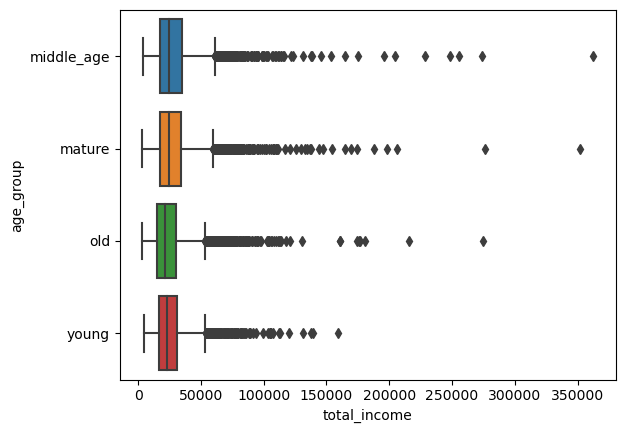

In [62]:
# Grouping `total_income` by `age_group`
sns.boxplot(data=df, y='age_group', x='total_income')

<Axes: xlabel='total_income', ylabel='income_type'>

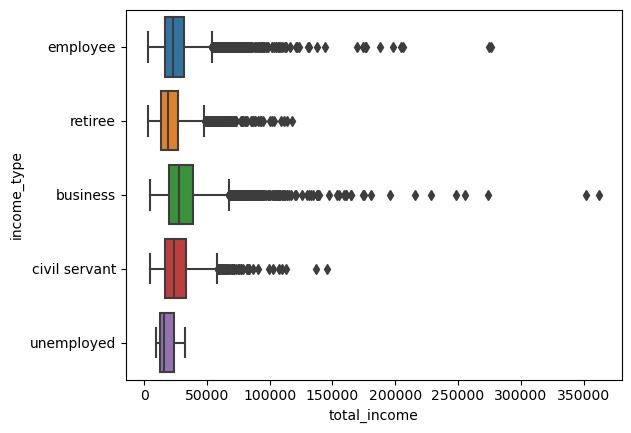

In [63]:
# Grouping `total_income` by `income_type`
sns.boxplot(data=df, y='income_type', x='total_income')

Upon comparing these two visualizations, it appears to be more meaningful to choose a grouping based on the `income_type` category. This choice would provide a more representative view of the unemployed and retiree groups. Using the `age_group` category would blur this information.

Furthermore, it is evident that there are notable outliers in the two largest groups in the `income_type` column, namely employees and business owners. Therefore, we will reevaluate the mean and median values for further analysis.

In [64]:
# Checking the median value
df.groupby('income_type')['total_income'].median()

income_type
business         27583.3600
civil servant    24071.6695
employee         22814.0140
retiree          18962.3180
unemployed       15712.2600
Name: total_income, dtype: float64

In [65]:
# Checking the mean value
df.groupby('income_type')['total_income'].mean()

income_type
business         32397.165026
civil servant    27343.729582
employee         25819.123443
retiree          21940.394503
unemployed       19246.993667
Name: total_income, dtype: float64

The significant difference between the mean and median indicates the presence of outliers. Hence, we will utilize the median data for further analysis. This allows us to rely on the existing pre-built functions in this case.

In [66]:
# Implement a function to fill in missing values using the median
fill_missing_value(df, 'income_type', 'total_income')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23,middle_age
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11,mature
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15,mature
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11,mature
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12,middle_age
21450,0,343937,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942,old
21451,1,2113,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5,mature
21452,3,3112,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8,mature


In [67]:
# Check if we get any error
df['total_income'].isna().sum()

0

Missing values ​​are no longer found, function works fine.

#### Final Check

We've filled in missing values ​​in all columns. We will check our dataset again.

In [68]:
# Rechecking the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  int32  
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  years_employed    21454 non-null  int32  
 13  age_group         21454 non-null  object 
dtypes: float64(1), int32(2), int64(5), object(6)
memory usage: 2.1+ MB


All rows already have the same non-null value, no more *missing value*.

### 4.10 Data Categorization

After cleaning the missing data, we will proceed with categorizing the data. Upon closer inspection, we have observed that the `purpose` column contains several unique values that actually represent the same thing. We will simplify and consolidate these values.

In [69]:
# Returns the unique value of the `purpose` column
sorted(df['purpose'].unique())

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

There are several variations of the same information in the `purpose` column. In general, the purpose of customer loans can be grouped into four categories: buying a house (housing), buying a vehicle (car), paying for education (education), and wedding expenses (wedding). We have not identified any other overarching category beyond these four.

Next, we will simplify all the unique values in the `purpose` column into these four categories.

In [70]:
# Defines a function to simplify the categories in the purpose column
def purpose_category(purpose):
    if 'prop' in purpose:
        return 'housing'
    if 'real' in purpose:
        return 'housing'
    if 'hous' in purpose:
        return 'housing'
    if 'car' in purpose:
        return 'car'
    if 'edu' in purpose:
        return 'education'
    if 'univ' in purpose:
        return 'education'
    if 'wed'in purpose:
        return 'wedding'
    else:
        return 'unknown'
    

In [71]:
# Implement the function and create a new categorical column
df['purpose_category'] = df['purpose'].apply(purpose_category)
df['purpose_category'].unique()

array(['housing', 'car', 'education', 'wedding'], dtype=object)

In [72]:
# Delete the `purpose` column
df.drop('purpose', axis=1, inplace=True)

The `purpose` column has now been replaced with a new column, namely `purpose_category`.
We'll look at other columns that have too many unique values.

In [73]:
# Rechecking the dataframe
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,years_employed,age_group,purpose_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,23,middle_age,housing
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,11,mature,car
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,15,mature,housing
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,11,mature,education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,932,old,wedding
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,2,young,housing
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484.156,7,middle_age,housing
7,0,152,50,secondary education,1,married,0,M,employee,0,21731.829,0,middle_age,education
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,18,mature,wedding
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108.150,5,middle_age,housing


Based on the available data, we can still group the `total_income` column. However, we will not group the `days_employed` and `years_employed` columns for this analysis since we are not using the age category to measure the potential default. Therefore, we will ignore this category.

In [74]:
# Viewing all of the numeric data in `total_income` column
print('Total Unique Values in `total_income`:', df['total_income'].nunique())
print('Lowest Value:', df['total_income'].min())
print('Highest Value:', df['total_income'].max())

Total Unique Values in `total_income`: 19350
Lowest Value: 3306.762
Highest Value: 362496.645


There are 19,350 different total income values in the `total_income` column, from USD3306 to USD362,496.

<Axes: xlabel='total_income'>

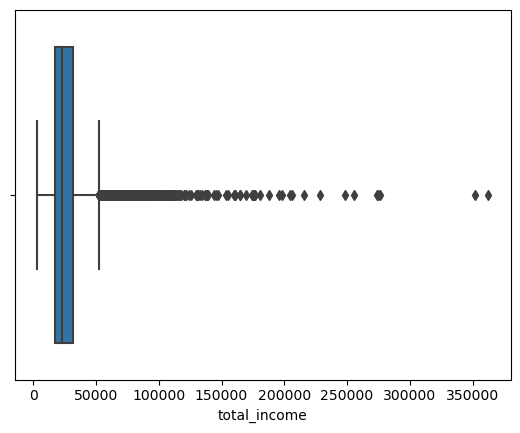

In [75]:
# Displays visualization of data distribution
sns.boxplot(x='total_income', data=df, orient='h')

We will group these `total_income` columns by range. To do this, we will define a new function.

In [76]:
# Create a function that categorizes data into different numeric groups based on a specified range
def income_group(income):
    if income <= 30000:
        return 'small'
    if 30000 < income <= 50000:
        return 'medium'
    if 50000 < income <= 100000:
        return 'average'
    if 100000 < income <= 200000:
        return 'high'
    if income > 200000:
        return 'very_high'
    else:
        'unidentified'


In [77]:
# Create a new column by applying the function
df['income_group'] = df['total_income'].apply(income_group)

In [78]:
# See the distribution of values in the new column
df['income_group'].value_counts()

small        15535
medium        4599
average       1221
high            88
very_high       11
Name: income_group, dtype: int64

## 5. Testing Hypotheses

Up to this point, we have completed the entire data cleansing process. Now, we can proceed with the analysis to test our initial hypothesis, which is related to the correlation between having children and marital status with the likelihood of default on bank customers.

We will use the `debt` column as our reference. This column contains two values: 0 for customers who pay on time and 1 for customers who fail to pay. Let's calculate the distribution.

In [79]:
counting_values(df, 'debt')

,counts,%
0,19713,91.9%
1,1741,8.1%


Based on the available data, there is a considerable number of customers who have experienced default, reaching 8.1 percent. This is a relatively high percentage for a bank.

Now, let's proceed to test the hypothesis regarding the correlation between owning children and the risk of default.

#### 5.1 Correlation between Number of Children and Default Risk

We will do some testing. For that, we'll define a custom function.

In [80]:
# Defines a function to calculate the default risk percentage based on a certain category
def calculate_default_probability(df, index):
    # Check the data for the number of unique values in each category from the selected column 
    value_count = df.pivot_table(index=index, values='debt', aggfunc='count', margins=True)

    # Calculate the number of defaults based on the category in the selected column
    default_count = df.pivot_table(index=index, values='debt', aggfunc='sum', margins=True)

    # Creating a new dataset
    merge = value_count.merge(default_count, on=index, how='left')

    merge['persentage'] = round((merge['debt_y'] / merge['debt_x']) * 100, 2).astype(str) + '%'
    
    merge = merge.rename(columns={'debt_x': 'total_value', 'debt_y': 'default'})

    return merge

Checking the potential for default based on the number of children

In [81]:
# Implement function and check default risk
calculate_default_probability(df, 'children')

,total_value,default,persentage
children,,,
0,14091,1063,7.54%
1,4855,445,9.17%
2,2128,202,9.49%
3,330,27,8.18%
4,41,4,9.76%
5,9,0,0.0%
All,21454,1741,8.12%


**Conclusion**

Based on the results of this analysis, the average potential for customer default is 8.12 percent. Customers with 1-4 children have a higher risk of default compared to the average, while customers without children have a lower risk than the average.

It's worth noting that customers with 5 children show an anomaly, as they have no risk of default. However, the data in this group is very limited, so we cannot draw valid conclusions based on it.

In general, we can conclude that the risk of default is higher for customers who have children compared to those who do not have children. Furthermore, the risk of default tends to increase with the number of children.

#### 5.4 Correlation between Family Status and Default Risk

Next, we will examine the second hypothesis, namely that there is a relationship between family status and the potential for customer default.

In [82]:
# Implement function and check default risk
calculate_default_probability(df, 'family_status')

,total_value,default,persentage
family_status,,,
civil partnership,4151,388,9.35%
divorced,1195,85,7.11%
married,12339,931,7.55%
unmarried,2810,274,9.75%
widowed,959,63,6.57%
All,21454,1741,8.12%


**Conclusion**

In general, customers with a family status of 'civil_partnership' and 'unmarried' have a higher risk of default compared to the average (8.11 percent). Both groups have a risk score that is significantly higher than the average. On the other hand, the remaining customer groups have default risks below the average.

#### 5.5 Correlation between Income Level and Default Risk

We have addressed the two main questions that were the focus of this analysis. Now, we will explore the possibility of other factors that may correlate with the potential for customer default. We will analyze this based on the categories of income levels.

In [83]:
# Implement function and check default risk
calculate_default_probability(df, 'income_group')

,total_value,default,persentage
income_group,,,
average,1221,86,7.04%
high,88,5,5.68%
medium,4599,344,7.48%
small,15535,1305,8.4%
very_high,11,1,9.09%
All,21454,1741,8.12%


**Conclusion**

Customers with very high income levels (very_high) have the highest default risk, reaching 9.09 percent. However, it's important to note that there is not enough data in this group to fully validate this conclusion.

In the second position, customers with low income levels have a default risk of 8.40 percent. For the other income categories, the default risk is below the average.

#### 5.6 Correlation between Credit Objective and Default Risk

We will now analyze the correlation between credit objective and the potential for customer default.

In [84]:
# Implement function and check default risk
calculate_default_probability(df, 'purpose_category')

,total_value,default,persentage
purpose_category,,,
car,4306,403,9.36%
education,4013,370,9.22%
housing,10811,782,7.23%
wedding,2324,186,8.0%
All,21454,1741,8.12%


**Conclusion**

Loans for purchasing cars and education have a significantly higher risk of default compared to the average. On the other hand, loans for housing and weddings have a relatively lower risk of default.

## 6. General Conclusion

- In general, the risk of default for customers in this dataset is relatively high, reaching 8.11 percent. Compared to the non-performing loan (NPL) category for banks, which is typically capped at 3 percent, the default risk is quite significant.

- While the overall default risk is high, it is important to note that the differences in risk between customer groups are not substantial. However, certain groups do exhibit a relatively higher risk compared to others.

- Based on the analysis, there is a correlation between a customer's marital status and the number of children they have with the probability of default on their loan repayment. The presence of more children is associated with a higher risk of default. Additionally, customers who are categorized as 'unmarried' or 'civil_partnership' show a higher risk of default compared to other marital statuses.

- Furthermore, the purpose of the loan also plays a role in default risk. Loans for purchasing vehicles and education have the highest risk of default, while loans for housing and weddings have a relatively lower risk.

- Lastly, it is worth noting that customers with lower income levels (below USD 50,000) have a higher risk of default. This finding aligns with expectations, as lower income may present challenges in meeting loan repayment obligations.

- Overall, these insights highlight the importance of considering factors such as marital status, number of children, loan purpose, and income level when assessing the risk of default among bank customers. By understanding these correlations, banks can better evaluate the creditworthiness of customers and make informed lending decisions.